## Learning Vector Quantization Showcase

In [60]:
from sklearn.datasets import load_iris
import pandas as pd
import LearningVectorQuantization as lvq
import matplotlib.pyplot as plt
from importlib import reload

<module 'LearningVectorQuantization' from '/Users/matthewan/Code/LearningVectorQuantization/LearningVectorQuantization.py'>

In [61]:
iris = load_iris()
mapper = {i: name for i, name in enumerate(iris["target_names"])}

data = pd.DataFrame(iris["data"], columns = iris["feature_names"]).rename(columns=lambda x: x[:-5].replace(" ", "_"))
data["species"] = pd.DataFrame(iris["target"]).replace(mapper)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
model = lvq.LearningVectorQuantization(data, class_column="species", n_prototypes=2, learning_rate=0.1)
model.train(n_iteration=1000, learning_rate_updator = lambda x: 0.99 * x, lr_threshold= 0.0001)

Training finished after 688 iterations and 1.752s (0.003s per iteration.)


Learning rate updator controls the change of the learning rate over time. Other choices include:
- Using `lambda x: x` gives a constant learning rate
- Using `lambda x: x - 0.0001` gives a constantly decreaseing rate; the training will end early if it drops below the lr_threshold.

### Visualizing the Model

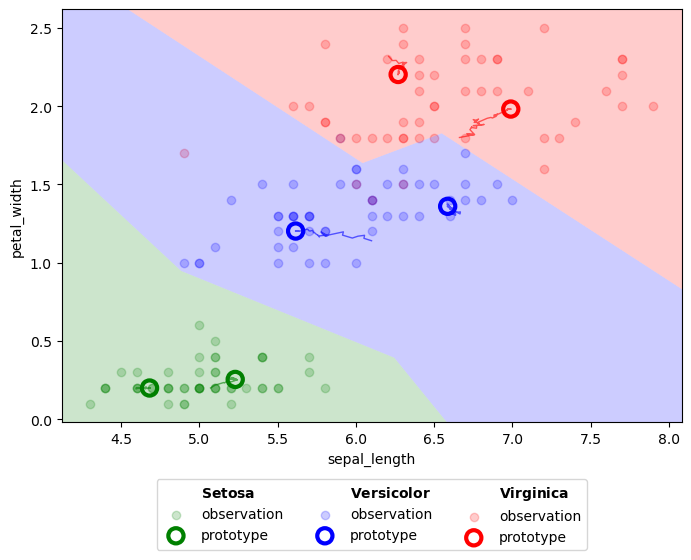

In [63]:
color_mapper = {"setosa": "green", "versicolor": "blue", "virginica": "red"}
x = "sepal_length"
y = "petal_width"
fig, ax = plt.subplots(1, 1, figsize = (8,6))
model.plot(fig, ax, x, y, color_mapper, plot_paths=True, v_adjust = -0.12)
# v_adjust nudges the legend up/downwards; if plot_paths, then the prototypes have a trace to show their movement over the iterations.

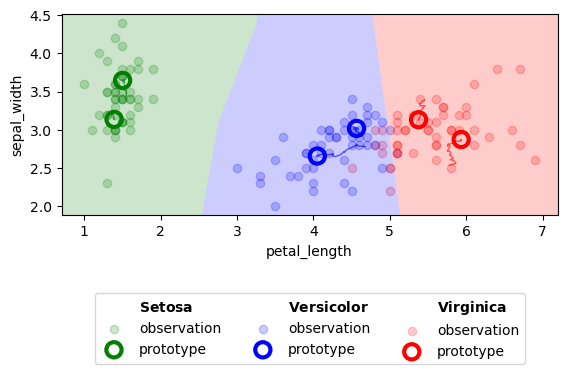

In [64]:
color_mapper = {"setosa": "green", "versicolor": "blue", "virginica": "red"}
x = "petal_length"
y = "sepal_width"
fig, ax = plt.subplots(1,1)
model.plot(fig, ax, x, y, color_mapper, plot_paths=True)